In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score , roc_curve , classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

In [22]:
df=pd.read_csv("Loan_Data.csv")

In [23]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
pf=ProfileReport(df)

In [6]:
pf

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Analysis of Data

In [24]:
#Need to handle the missing values

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [28]:
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])

In [30]:
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])

In [32]:
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [34]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [36]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [38]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [39]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [42]:
#Now need to convert the Target variable into Numerical variable

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
df["Loan_Status"]=le.fit_transform(df["Loan_Status"])
#Here 1 means "Yes" and 0 means "No"

In [44]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 60.1+ KB


In [46]:
#Now need to convert all the categorical varible into numerical variable

df=df.apply(le.fit_transform)

In [47]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,100,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,8,1,0,1
610,610,1,1,3,0,0,275,0,7,5,1,0,1
611,611,1,1,1,0,0,431,3,163,8,1,2,1
612,612,1,1,2,0,0,422,0,133,8,1,2,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_ID            614 non-null    int32
 1   Gender             614 non-null    int32
 2   Married            614 non-null    int32
 3   Dependents         614 non-null    int32
 4   Education          614 non-null    int32
 5   Self_Employed      614 non-null    int32
 6   ApplicantIncome    614 non-null    int64
 7   CoapplicantIncome  614 non-null    int64
 8   LoanAmount         614 non-null    int64
 9   Loan_Amount_Term   614 non-null    int64
 10  Credit_History     614 non-null    int64
 11  Property_Area      614 non-null    int32
 12  Loan_Status        614 non-null    int64
dtypes: int32(7), int64(6)
memory usage: 45.7 KB


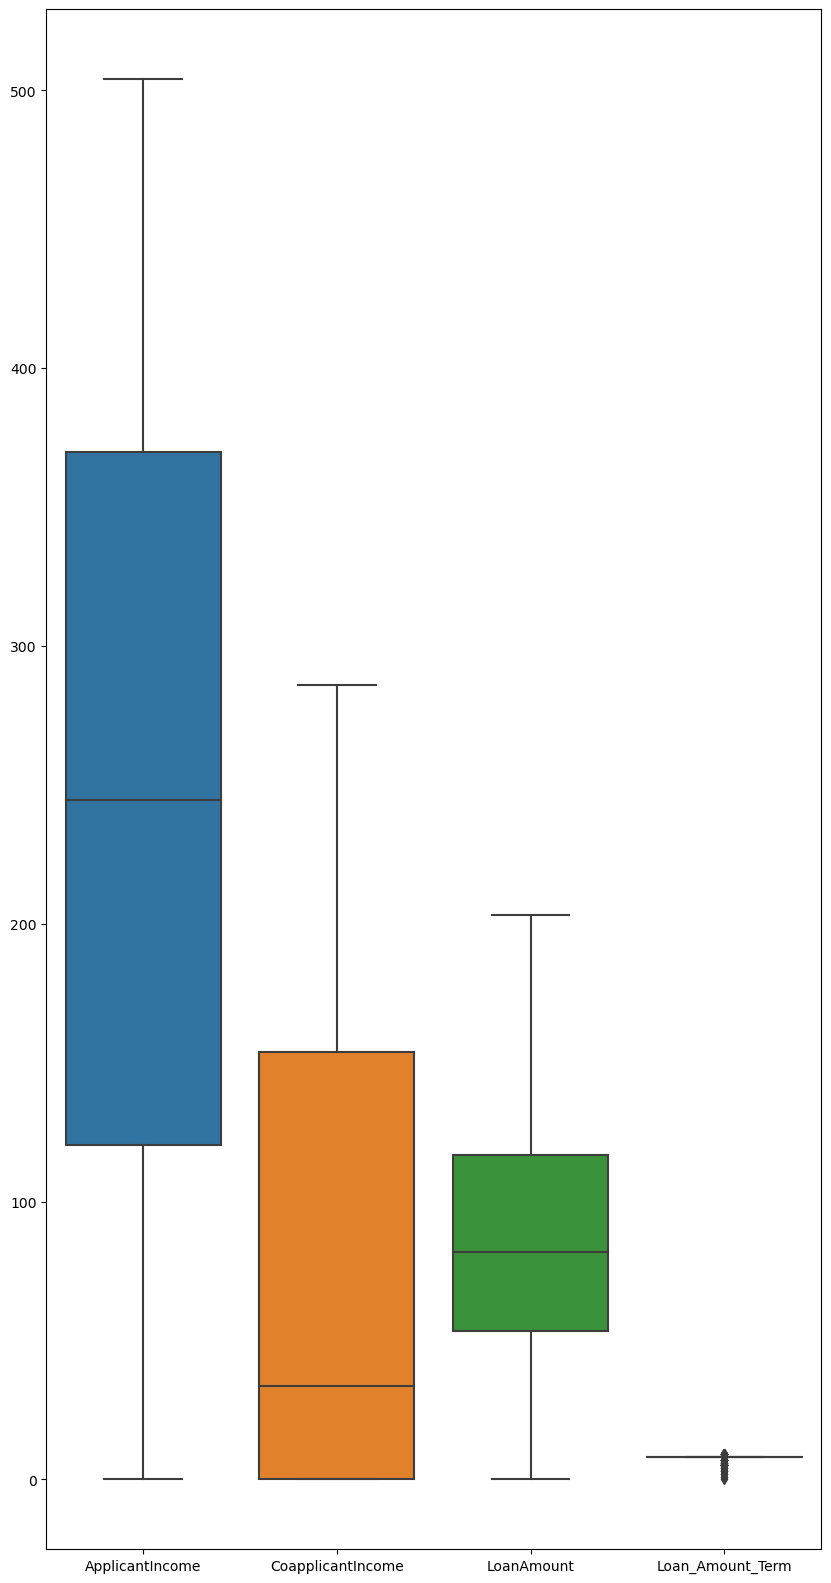

In [64]:
#As per our analysis there is some skewed data , so need to check the Outliers

fig , ax =plt.subplots(figsize=(10,20))
sns.boxplot(data=df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]] , ax=ax)
plt.show()

In [71]:
#As per the boxplot outliers are in Loan_Amount_Term column
#Hence we will do ouliers treatement by Quantile method

q=df["Loan_Amount_Term"].quantile(.98)
df_new=df[df["Loan_Amount_Term"] < q]

In [72]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,100,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,8,1,0,1
610,610,1,1,3,0,0,275,0,7,5,1,0,1
611,611,1,1,1,0,0,431,3,163,8,1,2,1
612,612,1,1,2,0,0,422,0,133,8,1,2,1


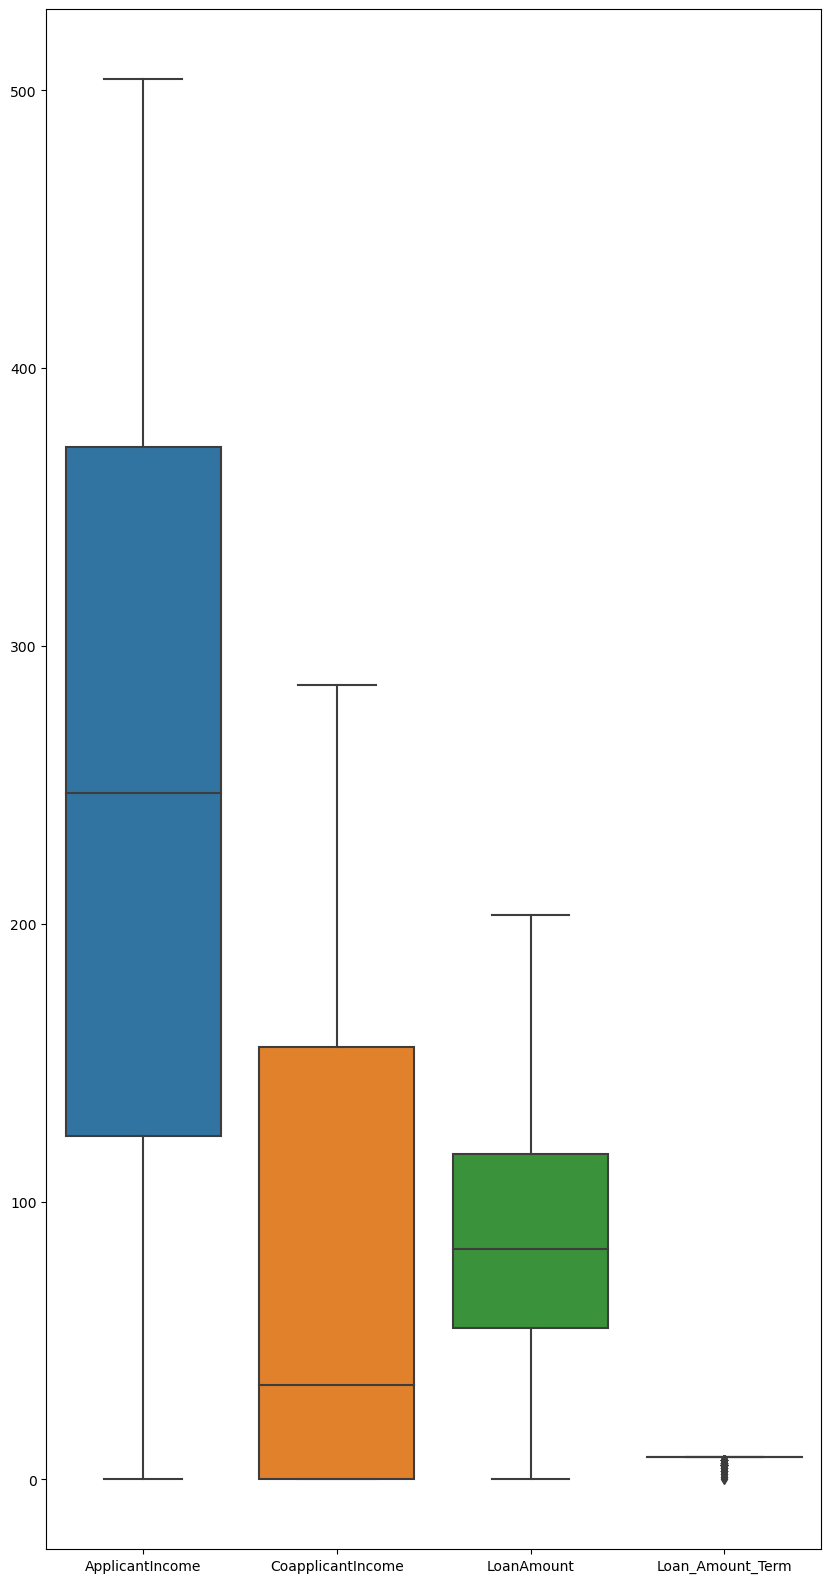

In [78]:
fig , ax =plt.subplots(figsize=(10,20))
sns.boxplot(data=df_new[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]] , ax=ax)
plt.show()

In [79]:
#Now we will split the data set

X=df_new.drop(columns="Loan_Status")

In [80]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,376,0,100,8,1,2
1,1,1,1,1,0,0,306,60,81,8,1,0
2,2,1,1,0,0,1,139,0,26,8,1,2
3,3,1,1,0,1,0,90,160,73,8,1,2
4,4,1,0,0,0,0,381,0,94,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,8,1,0
610,610,1,1,3,0,0,275,0,7,5,1,0
611,611,1,1,1,0,0,431,3,163,8,1,2
612,612,1,1,2,0,0,422,0,133,8,1,2


In [81]:
y=df_new["Loan_Status"]

In [82]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 599, dtype: int64

In [84]:
#Now there is a variance in the dataset values , hence we will do scaling of dataset

scaler=StandardScaler()
scaler.fit_transform(df_new)

array([[-1.72457862,  0.46899815, -1.39150081, ...,  0.40665667,
         1.22803658,  0.66325248],
       [-1.7189574 ,  0.46899815,  0.71864852, ...,  0.40665667,
        -1.30849415, -1.50772147],
       [-1.71333618,  0.46899815,  0.71864852, ...,  0.40665667,
         1.22803658,  0.66325248],
       ...,
       [ 1.70998597,  0.46899815,  0.71864852, ...,  0.40665667,
         1.22803658,  0.66325248],
       [ 1.71560719,  0.46899815,  0.71864852, ...,  0.40665667,
         1.22803658,  0.66325248],
       [ 1.72122841, -2.13220456, -1.39150081, ..., -2.45907682,
        -0.04022878, -1.50772147]])

In [88]:
df_new_scalar=pd.DataFrame(scaler.fit_transform(df_new))

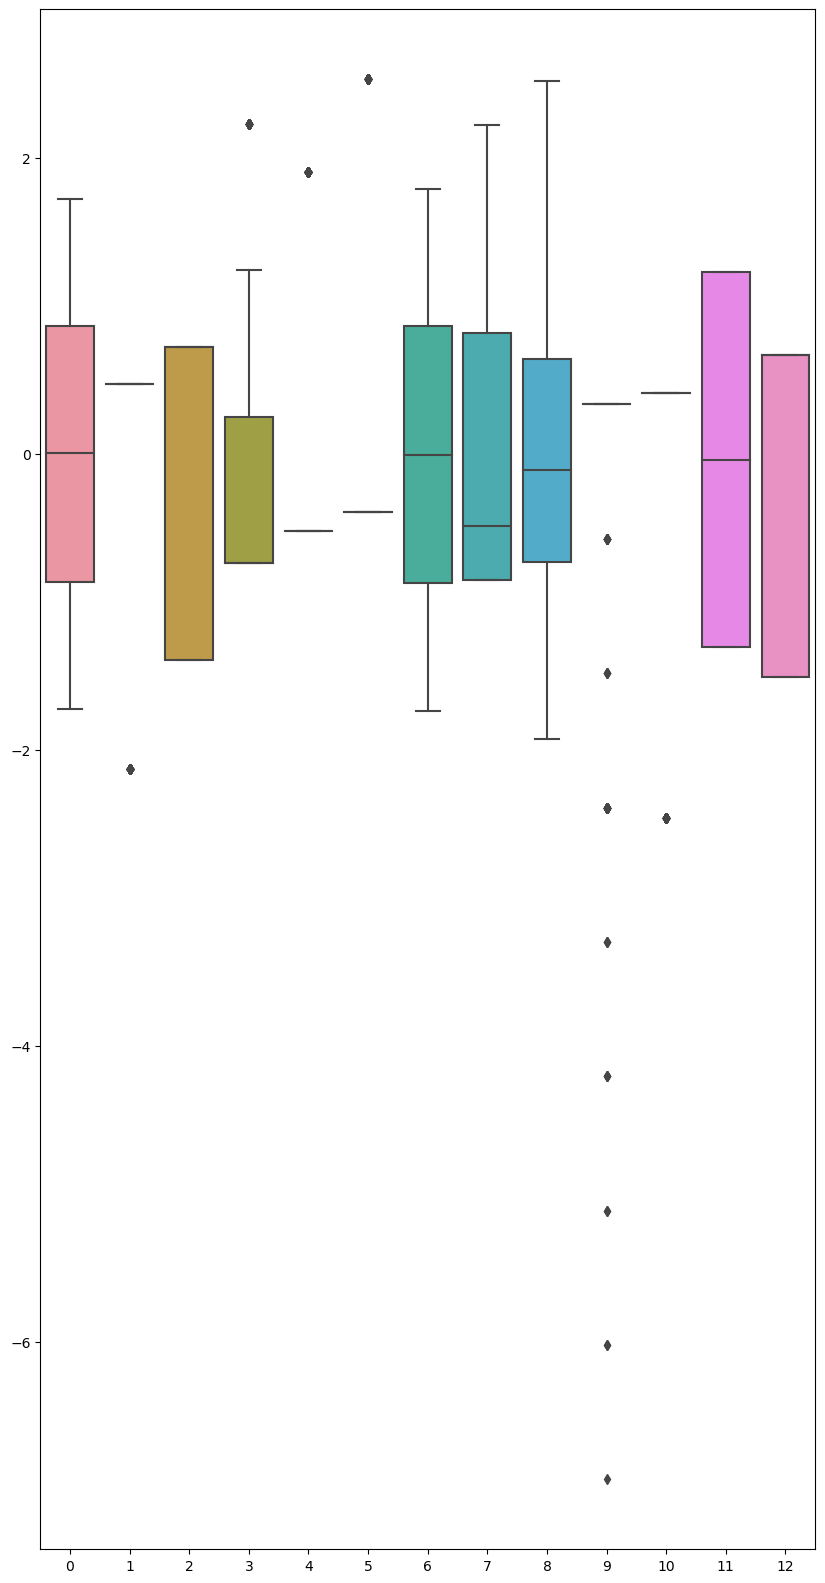

In [89]:
fig , ax =plt.subplots(figsize=(10,20))
sns.boxplot(data=df_new_scalar , ax=ax)
plt.show()

In [85]:
X_scaled=scaler.fit_transform(X)

In [86]:
X_scaled

array([[-1.72457862,  0.46899815, -1.39150081, ...,  0.33188219,
         0.40665667,  1.22803658],
       [-1.7189574 ,  0.46899815,  0.71864852, ...,  0.33188219,
         0.40665667, -1.30849415],
       [-1.71333618,  0.46899815,  0.71864852, ...,  0.33188219,
         0.40665667,  1.22803658],
       ...,
       [ 1.70998597,  0.46899815,  0.71864852, ...,  0.33188219,
         0.40665667,  1.22803658],
       [ 1.71560719,  0.46899815,  0.71864852, ...,  0.33188219,
         0.40665667,  1.22803658],
       [ 1.72122841, -2.13220456, -1.39150081, ...,  0.33188219,
        -2.45907682, -0.04022878]])

In [87]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 599, dtype: int64

In [90]:
#Now nee to check the Multicollinearity

vif_df=pd.DataFrame()

In [92]:
X_scaled.shape

(599, 12)

In [93]:
X_scaled.shape[1]

12

In [95]:
vif_df["vif"]=[variance_inflation_factor(X_scaled ,i)for i in range(X_scaled.shape[1])]

vif_df["feature"]=X.columns

In [96]:
vif_df

,vif,feature
0,1.038099,Loan_ID
1,1.208671,Gender
2,1.319426,Married
3,1.196738,Dependents
4,1.086881,Education
5,1.043169,Self_Employed
6,1.888500,ApplicantIncome
7,1.512326,CoapplicantIncome
8,1.860716,LoanAmount
9,1.046253,Loan_Amount_Term


In [97]:
#None of the feature is having vif value greater than 10 , hence there is no Multicollinearity

In [101]:
 x_train , x_test , y_train , y_test = train_test_split(X_scaled, y , test_size=.20, random_state=144)

In [102]:
x_train

array([[ 1.42892504, -2.13220456,  0.71864852, ...,  0.33188219,
         0.40665667, -0.04022878],
       [-0.52725905,  0.46899815,  0.71864852, ...,  0.33188219,
         0.40665667, -1.30849415],
       [-1.66274521,  0.46899815,  0.71864852, ...,  0.33188219,
         0.40665667,  1.22803658],
       ...,
       [-0.4822893 ,  0.46899815,  0.71864852, ...,  0.33188219,
         0.40665667, -0.04022878],
       [ 0.83869708,  0.46899815,  0.71864852, ...,  0.33188219,
         0.40665667,  1.22803658],
       [ 0.35527228, -2.13220456, -1.39150081, ...,  0.33188219,
         0.40665667, -0.04022878]])

In [103]:
x_test

array([[-1.53345719,  0.46899815, -1.39150081, ...,  0.33188219,
         0.40665667, -1.30849415],
       [ 0.3608935 ,  0.46899815,  0.71864852, ...,  0.33188219,
         0.40665667, -0.04022878],
       [ 1.61442526,  0.46899815,  0.71864852, ...,  0.33188219,
         0.40665667,  1.22803658],
       ...,
       [ 0.05734769,  0.46899815,  0.71864852, ...,  0.33188219,
         0.40665667,  1.22803658],
       [-0.34175883,  0.46899815,  0.71864852, ...,  0.33188219,
         0.40665667,  1.22803658],
       [ 0.63633321,  0.46899815,  0.71864852, ...,  0.33188219,
         0.40665667, -1.30849415]])

# LogisticRegression

In [104]:
logr=LogisticRegression(verbose=1)

In [105]:
logr.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(verbose=1)

In [108]:
logr.predict(x_test[[1]])

array([1], dtype=int64)

In [109]:
logr.predict_proba(x_test[[1]])

array([[0.14241192, 0.85758808]])

In [110]:
logr.predict_log_proba(x_test[[1]])

array([[-1.9490316 , -0.15363138]])

In [112]:
y_pred=logr.predict(x_test)

In [113]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [114]:
confusion_matrix(y_test,y_pred)

array([[ 9, 27],
       [ 1, 83]], dtype=int64)

In [115]:
accuracy_score(y_test,y_pred)

0.7666666666666667

In [117]:
auc=roc_auc_score(y_test,y_pred)

In [118]:
auc

0.6190476190476191

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.25      0.39        36
           1       0.75      0.99      0.86        84

    accuracy                           0.77       120
   macro avg       0.83      0.62      0.62       120
weighted avg       0.80      0.77      0.72       120



In [121]:
fpr , tpr , thresholds = roc_curve(y_test,y_pred)

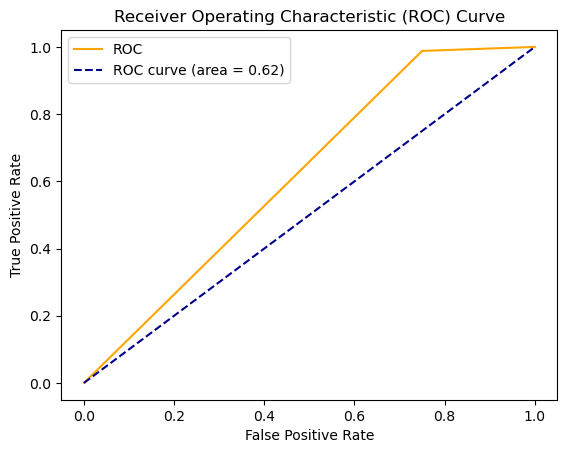

In [122]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [123]:
pickle.dump(logr,open("loan_prediction_logr_model.pickle","wb"))

In [124]:
log_liblinear=LogisticRegression()

In [125]:
log_liblinear.fit(x_train,y_train)

LogisticRegression()

In [126]:
log_liblinear.predict(x_test[[1]])

array([1], dtype=int64)

In [127]:
log_liblinear.predict_proba(x_test[[1]])

array([[0.14241192, 0.85758808]])

In [128]:
log_liblinear.predict_log_proba(x_test[[1]])

array([[-1.9490316 , -0.15363138]])

In [135]:
y_pred_liblinear=log_liblinear.predict(x_test)

In [136]:
y_pred_liblinear

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [137]:
confusion_matrix(y_test,y_pred_liblinear)

array([[ 9, 27],
       [ 1, 83]], dtype=int64)

In [138]:
accuracy_score(y_test,y_pred_liblinear)

0.7666666666666667

In [140]:
auc_liblinear=roc_auc_score(y_test,y_pred_liblinear)

In [141]:
auc_liblinear

0.6190476190476191

In [142]:
print(classification_report(y_test,y_pred_liblinear))

              precision    recall  f1-score   support

           0       0.90      0.25      0.39        36
           1       0.75      0.99      0.86        84

    accuracy                           0.77       120
   macro avg       0.83      0.62      0.62       120
weighted avg       0.80      0.77      0.72       120



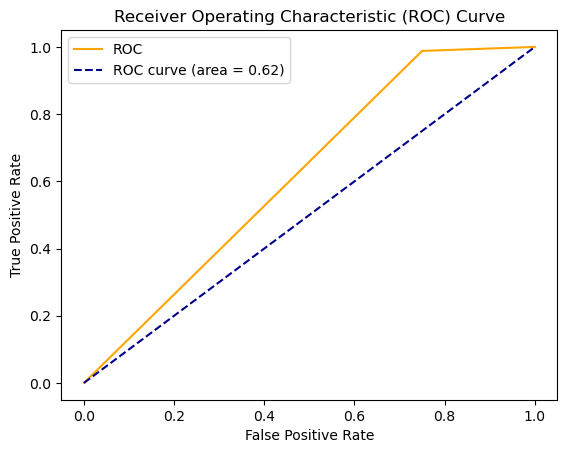

In [143]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_liblinear)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [144]:
pickle.dump(log_liblinear,open("loan_prediction_logliblinear_model.pickle","wb"))